In [1]:
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

flights = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv')

In [2]:
# see notebook acf_trend_and_seasonal.ipynb for step-by-step data clensing

flights['day'] = '01'
flights['year'] = flights['year'].astype(str)
flights['date'] = flights[['year', 'month', 'day']].apply(lambda x: '-'.join(x), axis=1)
flights = flights.set_index( pd.to_datetime( flights['date']) )
flights.head()

,year,month,passengers,day,date
date,,,,,
1949-01-01,1949,January,112,01,1949-January-01
1949-02-01,1949,February,118,01,1949-February-01
1949-03-01,1949,March,132,01,1949-March-01
1949-04-01,1949,April,129,01,1949-April-01
1949-05-01,1949,May,121,01,1949-May-01


Double check that pandas has the same idea for the frequency 

In [3]:
pd.infer_freq(flights.index)

'MS'

MS = month start frequency (https://stackoverflow.com/a/35339226/1033422)

This looks right.

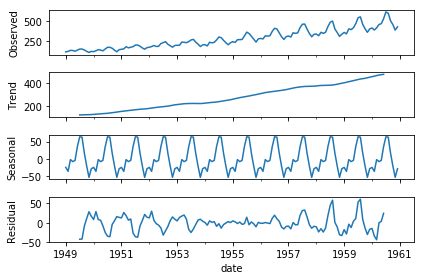

In [4]:
decomposition = sm.tsa.seasonal_decompose(flights['passengers'], model='additive')
fig = decomposition.plot()
plt.show()

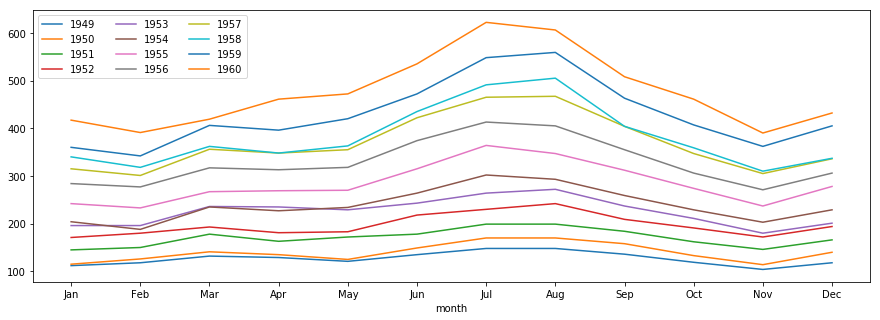

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))

for key, grp in flights.groupby(['year']):
    ax = grp.plot(ax=ax, kind='line', x='month', y='passengers', label=key)

#plt.xlabel('month')
plt.legend(loc='upper left', ncol=3)
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

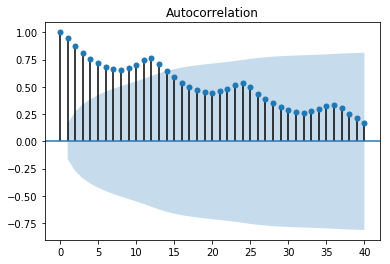

In [6]:
plot_acf(flights['passengers'], alpha=0.05, lags=40)
plt.show()